#DRE0065 - ZSU PROJECT

##Credit Card Data Dataset


# TASK 1


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [57]:
data = pd.read_csv('/content/CC GENERAL.csv', na_values=['NULL'])
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [59]:
print(data.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [60]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### Graf 1: Počet transakcí na zákazníka
- Největší skupinu tvoří zákazníci s 0 transakcemi.
- Hodnota 12 transakcí se vyskytuje častěji, což může ukazovat na specifické chování zákazníků.
- **Hypotéza**: Většina zákazníků nevyužívá kreditní kartu aktivně, což naznačuje, že karta může sloužit jako záložní finanční nástroj.

### Graf 2: Délka využívání kreditní karty
- Většina zákazníků má kreditní kartu 12 let.
- Ostatní délky (6–11 let) jsou zastoupeny minimálně.
- **Hypotéza**: Většina zákazníků zůstává dlouhodobými klienty, což může být indikátorem spokojenosti s nabízenými službami.


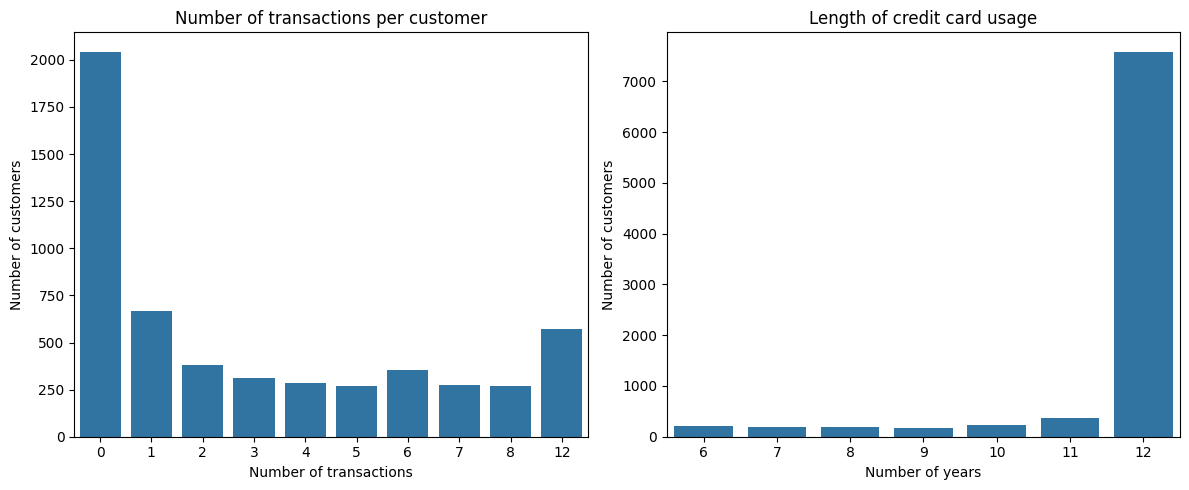

In [61]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_values = data['PURCHASES_TRX'].value_counts().head(10).index
filtered_data = data[data['PURCHASES_TRX'].isin(top_values)]

sns.countplot(x=filtered_data['PURCHASES_TRX'])
plt.title('Number of transactions per customer')
plt.xlabel('Number of transactions')
plt.ylabel('Number of customers')

plt.subplot(1, 2, 2)
sns.countplot(x=data['TENURE'])
plt.title('Length of credit card usage')
plt.xlabel('Number of years')
plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()

### Graf 1: Rozložení zůstatků na účtech
- Většina zákazníků má zůstatek nižší než 2 500.
- Výrazný vrchol u hodnoty 0 naznačuje neaktivní účty.
- Jsou přítomné i odlehlé hodnoty nad 15 000.
- **Hypotéza**: Neaktivní účty (se zůstatkem 0) mohou patřit zákazníkům, kteří kreditní kartu přestali používat, ale ponechali si ji pro případ nouze.

### Graf 2: Rozložení kreditních limitů
- Nejvíce zákazníků má kreditní limit v rozmezí 1 000–5 000.
- Nižší počet zákazníků má limit přes 10 000.
- Limit až do 30 000 může indikovat VIP klientelu.
- **Hypotéza**: Vyšší kreditní limity jsou přidělovány zákazníkům s vyššími příjmy nebo dlouhodobou historií spolehlivých plateb.


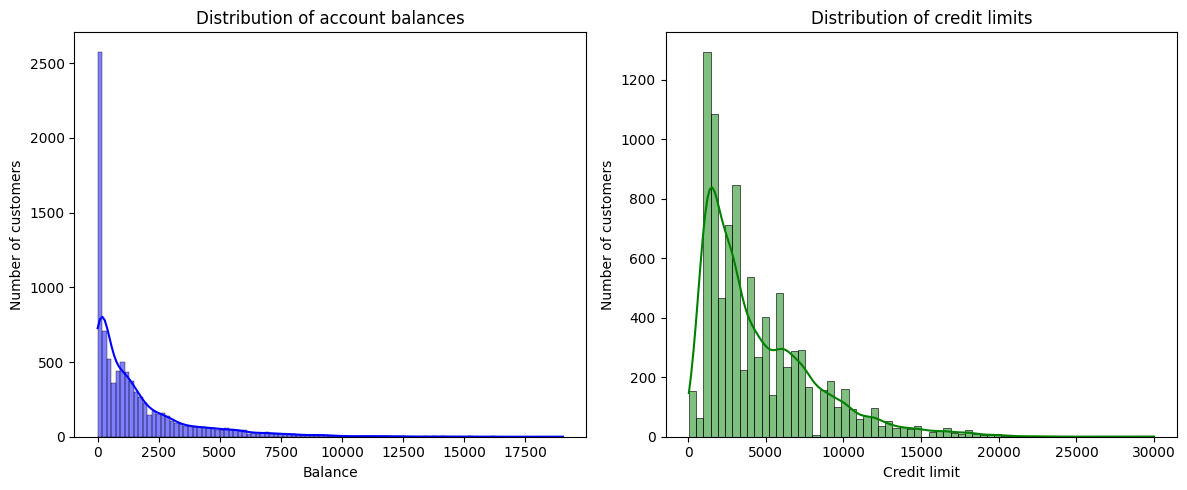

In [62]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BALANCE'], kde=True, color='blue')
plt.title('Distribution of account balances')
plt.xlabel('Balance')
plt.ylabel('Number of customers')

plt.subplot(1, 2, 2)
sns.histplot(data['CREDIT_LIMIT'], kde=True, color='green')
plt.title('Distribution of credit limits')
plt.xlabel('Credit limit')
plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()

### Graf 1: Zůstatek vs. Kreditní limit
- **Popis:** Tento scatterplot ukazuje vztah mezi zůstatkem na účtu a kreditním limitem zákazníka.
- **Zjištění:**
  - Zákazníci s vyšším kreditním limitem mají obecně vyšší zůstatky.
  - Většina bodů je soustředěna u nižších hodnot, což naznačuje, že většina zákazníků má nižší limity a zůstatky.
- **Hypotéza:** Vyšší kreditní limity jsou přidělovány zákazníkům s vyššími zůstatky na účtu, což může být indikátorem jejich finanční stability.

### Graf 2: Hotovostní záloha vs. Platby
- **Popis:** Tento scatterplot zkoumá vztah mezi hotovostními zálohami a platbami provedenými zákazníky.
- **Zjištění:**
  - U většiny zákazníků jsou zálohy a platby relativně nízké.
  - Několik odlehlých hodnot naznačuje zákazníky s velmi vysokými zálohami nebo platbami.
- **Hypotéza:** Zákazníci, kteří provádějí vysoké platby nebo čerpají velké zálohy, mohou mít odlišné finanční potřeby nebo preferují využívání těchto služeb častěji.


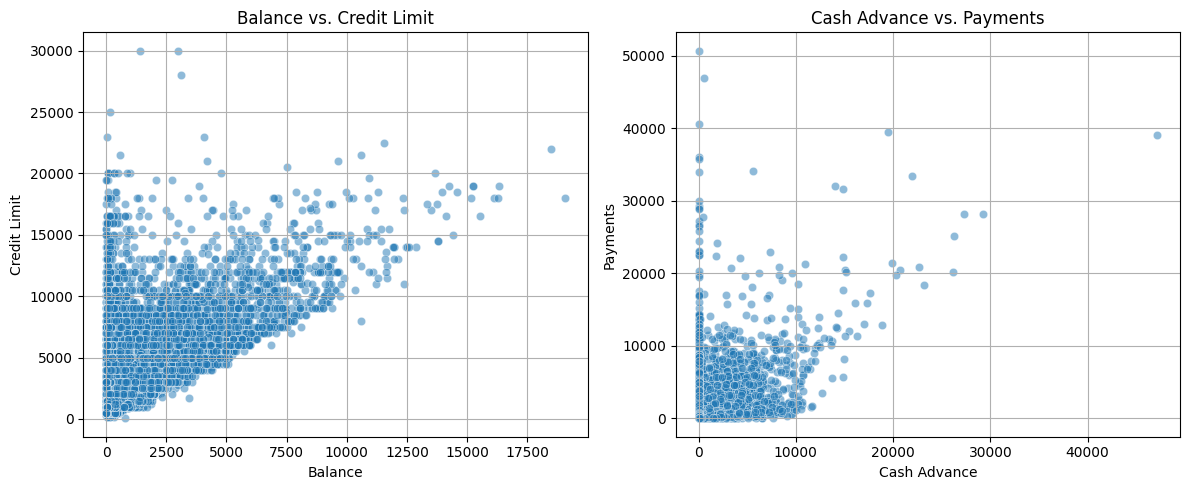

In [63]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['BALANCE'], y=data['CREDIT_LIMIT'], alpha=0.5)
plt.title('Balance vs. Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['CASH_ADVANCE'], y=data['PAYMENTS'], alpha=0.5)
plt.title('Cash Advance vs. Payments')
plt.xlabel('Cash Advance')
plt.ylabel('Payments')
plt.grid(True)

plt.tight_layout()
plt.show()

### Graf 1: Boxplot počtu transakcí
- **Popis:** Tento boxplot ukazuje rozložení počtu transakcí mezi zákazníky a identifikuje odlehlé hodnoty.
- **Zjištění:**
  - Většina zákazníků provádí velmi málo transakcí (do 10).
  - Existuje mnoho odlehlých hodnot u zákazníků, kteří provádějí více než 50 transakcí, přičemž maximální hodnota přesahuje 350 transakcí.
- **Hypotéza:** Zákazníci s vyšším počtem transakcí mohou patřit mezi aktivnější uživatele kreditních karet, což může být spojeno s jejich potřebou nebo finančními zvyklostmi.

### Graf 2: Boxplot procenta plné platby
- **Popis:** Tento boxplot zobrazuje, jaké procento zákazníků platí plnou částku svého zůstatku.
- **Zjištění:**
  - Většina zákazníků platí méně než 20 % svého zůstatku jako plnou platbu.
  - Existují odlehlé hodnoty, kde zákazníci platí až 100 % zůstatku, což může indikovat odlišné finanční chování.
- **Hypotéza:** Zákazníci, kteří pravidelně platí plnou částku svého zůstatku, mohou být finančně zodpovědnější nebo preferovat vyhýbání se úrokovým poplatkům.


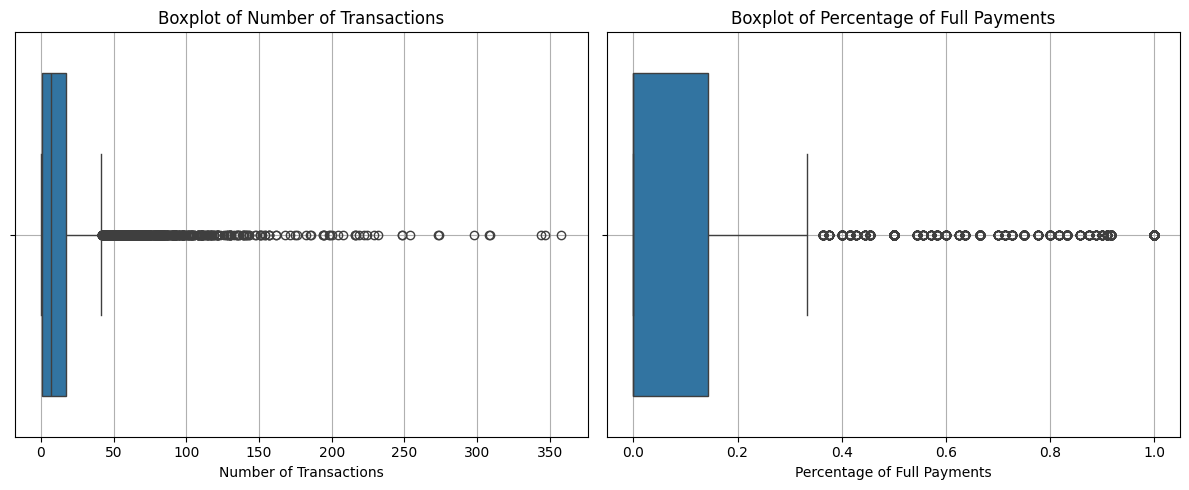

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['PURCHASES_TRX'])
plt.title('Boxplot of Number of Transactions')
plt.xlabel('Number of Transactions')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=data['PRC_FULL_PAYMENT'])
plt.title('Boxplot of Percentage of Full Payments')
plt.xlabel('Percentage of Full Payments')
plt.grid(True)

plt.tight_layout()
plt.show()

### Korelační heatmapa

- **Popis:** Korelační heatmapa zobrazuje vztahy mezi numerickými proměnnými v datasetu.
- **Zjištění:**
  - Silná pozitivní korelace mezi `ONEOFF_PURCHASES` a `PURCHASES` naznačuje, že jednorázové nákupy přispívají k vyšším celkovým nákupům.
  - Střední korelace mezi `BALANCE` a `CREDIT_LIMIT` potvrzuje, že vyšší limity mají často vyšší zůstatky.
  - `CASH_ADVANCE` má nízkou korelaci s ostatními atributy, což poukazuje na nezávislé chování v rámci záloh.

#### Hypotéza

Zákazníci s vyššími kreditními limity častěji provádějí jednorázové nákupy.

#### Zajímavost

Atribut `TENURE` nemá významnou korelaci s ostatními, což ukazuje na konzistenci chování zákazníků bez ohledu na délku vztahu s bankou.


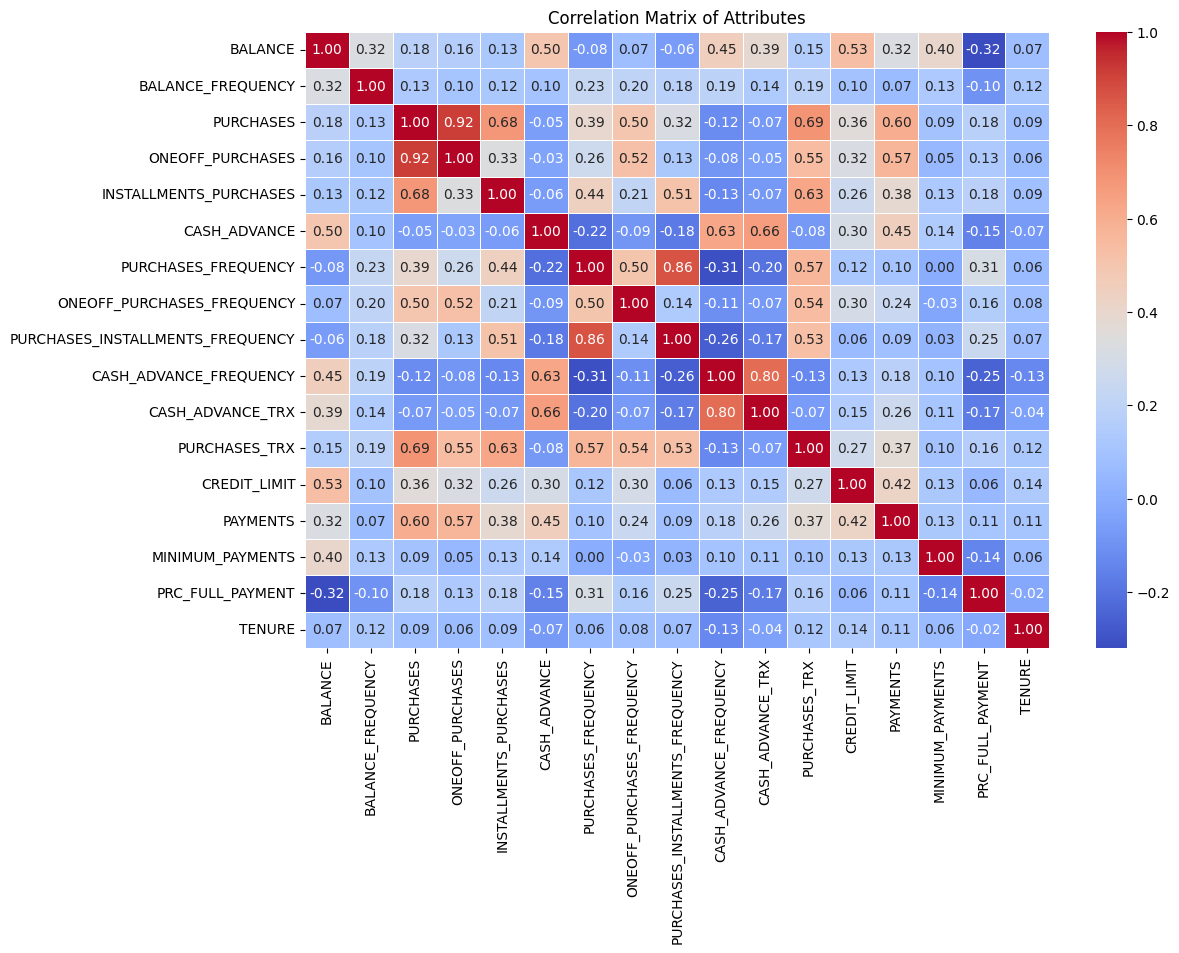

In [65]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Attributes')
plt.show()

### Závěr

- **Nízké zůstatky a limity**: Většina zákazníků má nízké zůstatky a kreditní limity (pod 5 000), což naznačuje opatrné využívání kreditních produktů.
- **Vztah mezi limity a zůstatky**: Zákazníci s vyššími limity mají tendenci mít vyšší zůstatky, což poukazuje na jejich finanční stabilitu.
- **Jednorázové nákupy**: ONEOFF_PURCHASES mají silnou korelaci s celkovými nákupy (PURCHASES), což ukazuje na jejich významnost v platebních návycích.
- **Atribut TENURE**: Doba využívání kreditní karty nemá významnou korelaci s jinými atributy, což naznačuje konzistentní chování zákazníků bez ohledu na délku vztahu s bankou.
- **Neaktivní účty**: Vysoký počet účtů s nulovým zůstatkem ukazuje na neaktivní zákazníky, kteří kartu využívají jako rezervu.
- **Segmentace**: EDA identifikovala klíčové atributy (`BALANCE`, `CREDIT_LIMIT`, `PURCHASES`) jako vhodné pro další analýzu a segmentaci zákazníků.


#TASK 2
### Preprocessing Pipeline

Na základě EDA jsem se rozhodl pro následující předzpracování atributů:

1. **Numerické atributy:**
   - BALANCE, CREDIT_LIMIT, PURCHASES: Normalizace pomocí Min-Max scaling (hodnoty převedeny do intervalu 0–1).
   - CASH_ADVANCE: Log transformace pro snížení vlivu extrémních hodnot.

2. **Vyřazené atributy:**
   - CUST_ID: Tento atribut není relevantní pro clustering.

3. **Chybějící hodnoty:**
   - Všechny chybějící hodnoty byly nahrazeny průměrnými hodnotami příslušných atributů, z důvodu malého počtu chybějících hodnot v celém datasetu, je v pořádku nahradit je průměrnými hodnotami.

In [66]:
selected_features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'CASH_ADVANCE']

data_cleaned = data[selected_features].apply(pd.to_numeric, errors='coerce')
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned)
data_normalized[:, 3] = np.log1p(data_normalized[:, 3])

##Part 1

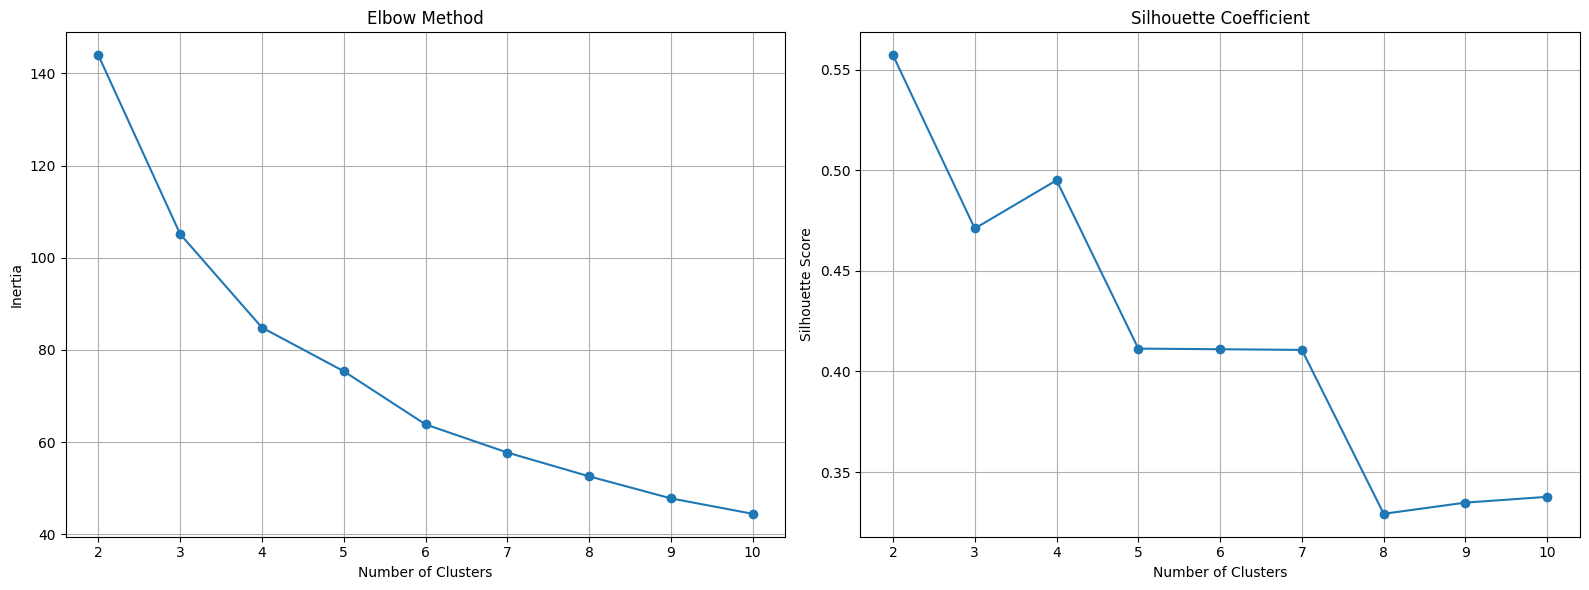

In [67]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    score = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(score)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(range(2, 11), inertia, marker='o')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title('Silhouette Coefficient')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [68]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster_ID'] = kmeans.fit_predict(data_normalized)
data['Cluster_ID'] = kmeans.labels_

print(data.sample(10))

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6348  C16523   447.563656           0.909091     911.09            911.09   
8252  C18473    64.995822           1.000000     550.00              0.00   
7236  C17431  2323.083307           0.888889       0.00              0.00   
8389  C18614   361.670150           1.000000     561.68            214.00   
1178  C11222  1786.707643           1.000000       0.00              0.00   
8028  C18245  1367.284172           1.000000     542.33            280.04   
1913  C11975  1856.325339           0.818182     670.50            516.90   
166   C10172   823.103926           0.363636     131.64              0.00   
3603  C13705    35.382803           0.545455     359.84              0.00   
3170  C13261    87.931814           0.909091     617.50              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6348                    0.00    896.215958             0.583333   
8252              

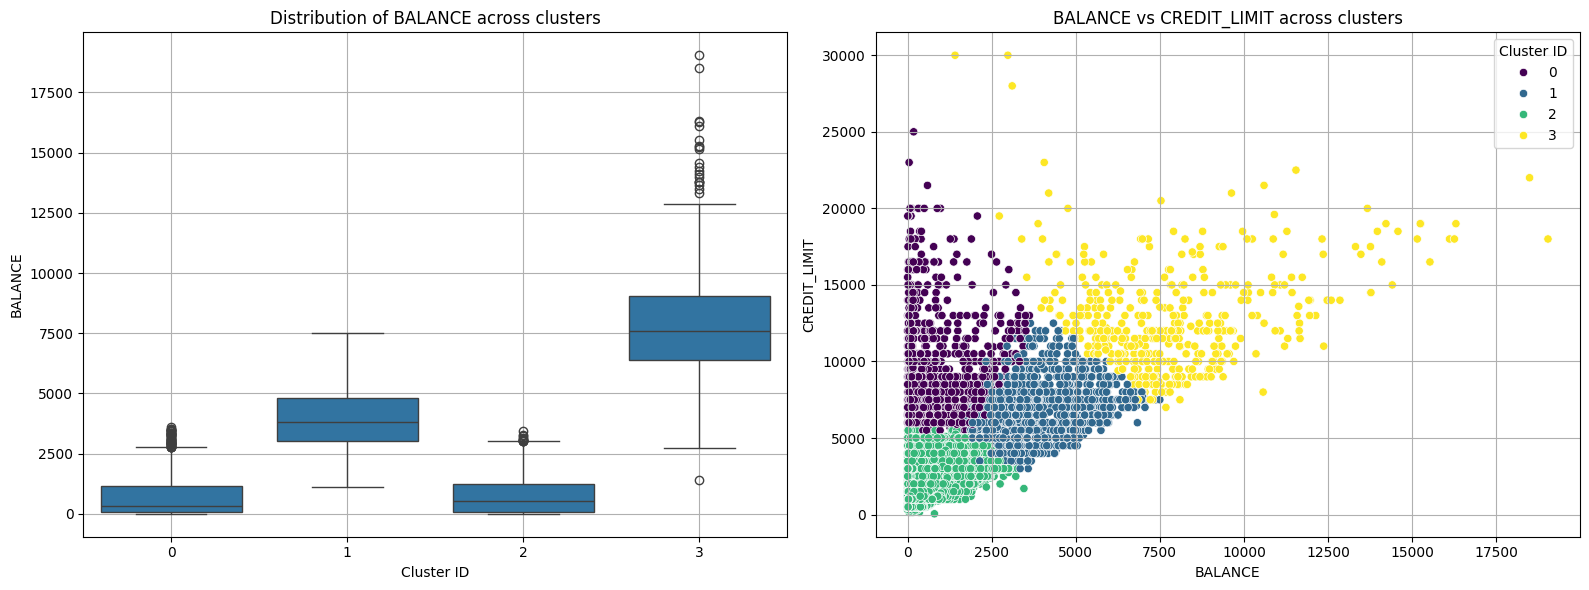

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], x=data['Cluster_ID'], y=data['BALANCE'])
axes[0].set_title('Distribution of BALANCE across clusters')
axes[0].set_xlabel('Cluster ID')
axes[0].set_ylabel('BALANCE')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['Cluster_ID'], palette='viridis')
axes[1].set_title('BALANCE vs CREDIT_LIMIT across clusters')
axes[1].set_xlabel('BALANCE')
axes[1].set_ylabel('CREDIT_LIMIT')
axes[1].legend(title='Cluster ID')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Charakteristika nalezených clusterů:

- **Cluster 0:**  
  Zákazníci s **nízkými až středními hodnotami CREDIT_LIMIT** a **nízkými hodnotami BALANCE**. Tito uživatelé pravděpodobně využívají kartu jen pro základní účely nebo ji drží jako zálohu.  
  - **Poznámka:** Tato skupina může obsahovat nové zákazníky nebo ty, kteří jsou opatrní při využívání úvěrového rámce.

- **Cluster 1:**  
  Zákazníci s **nízkými až středními hodnotami BALANCE** a **nízkými až středními hodnotami CREDIT_LIMIT**. Pravděpodobně jde o běžné uživatele, kteří kartu používají spíše na drobné nákupy.  
  - **Poznámka:** Mohou to být zákazníci s omezeným úvěrovým rámcem, ale relativně aktivní v používání karty. Marketingové kampaně by mohly motivovat tuto skupinu k vyššímu využívání kreditního rámce.

- **Cluster 2:**  
  Zákazníci s **nízkými hodnotami BALANCE** a **nízkými hodnotami CREDIT_LIMIT**. Tato skupina pravděpodobně zahrnuje zákazníky s velmi nízkou aktivitou nebo ty, kteří kartu téměř nevyužívají.  
  - **Poznámka:** Tito zákazníci mohou být blízko odchodu a vyžadují cílené retenční strategie, jako jsou slevy nebo zvýšení limitu.

- **Cluster 3:**  
  Zákazníci s **středními až vyššími hodnotami BALANCE** a **středními až vyššími hodnotami CREDIT_LIMIT**. Pravděpodobně jde o prémiovou klientelu, která kartu aktivně využívá na významné nákupy.  
  - **Poznámka:** Tato skupina představuje nejziskovější segment. Doporučuje se zaměřit na posílení loajality pomocí odměn, personalizovaných nabídek a dalších prémiových služeb.


### Shrnutí:
- **Cluster 0:** Nízké hodnoty BALANCE a CREDIT_LIMIT, minimální aktivita. Tato skupina může být cílem kampaní zaměřených na aktivaci.  
- **Cluster 1:** Nízké až střední hodnoty obou atributů, běžní uživatelé. Zaměření na zvýšení úvěrového rámce a motivaci k vyšší aktivitě.  
- **Cluster 2:** Nízké hodnoty obou atributů, velmi neaktivní zákazníci. Tato skupina potřebuje retenční strategie, aby zabránila jejich odchodu.  
- **Cluster 3:** Střední až vyšší hodnoty obou atributů, prémiová klientela. Důležité je zaměření na loajalitu a poskytování personalizovaných služeb.


##Part 2
### Určení optimálního počtu clusterů pomocí dendrogramu
- Dendrogram ukazuje hierarchickou strukturu dat.
- Na základě dendrogramu jsme se rozhodli pro **4 clustery** (místo, kde dojde k významnému zvětšení vzdáleností mezi shluky).


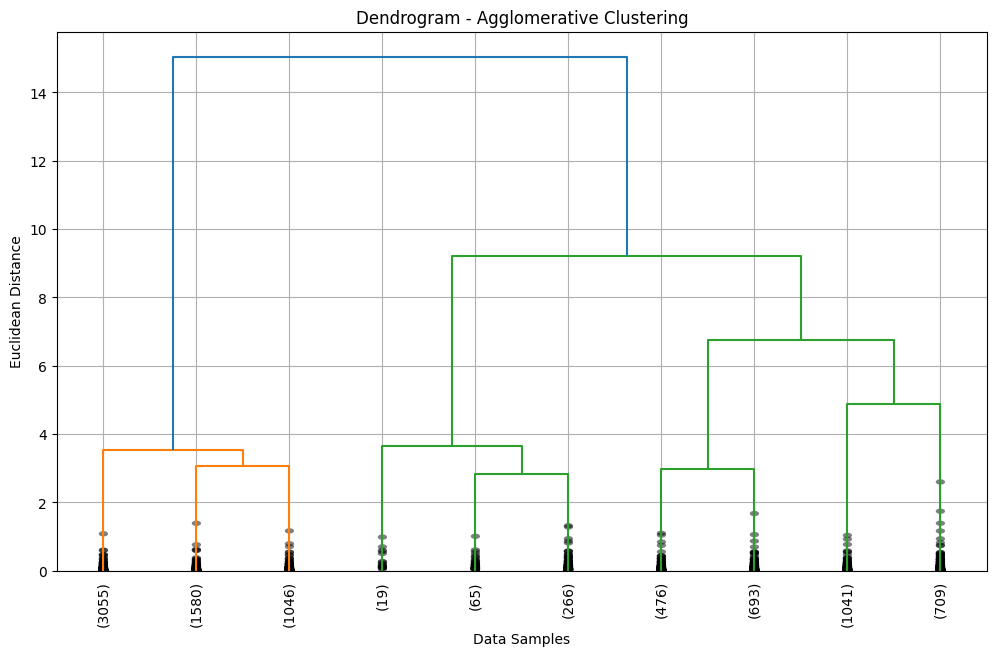

In [70]:
linked = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Data Samples')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

### Aplikace Agglomerativního Clusteringu
- **Použité parametry:**
  - Počet clusterů: 4
  - Metrika: Euklidovská vzdálenost
  - Metoda: Wardova metoda
- Každému zákazníkovi byl přiřazen `Cluster_ID` na základě jejich atributů.

### Vizualizace výsledků
- **Boxplot:** Rozložení hodnot `BALANCE` mezi jednotlivými clustery.
- **Scatter plot:** Vizualizace vztahu mezi `BALANCE` a `CREDIT_LIMIT` s barevným odlišením jednotlivých clusterů.


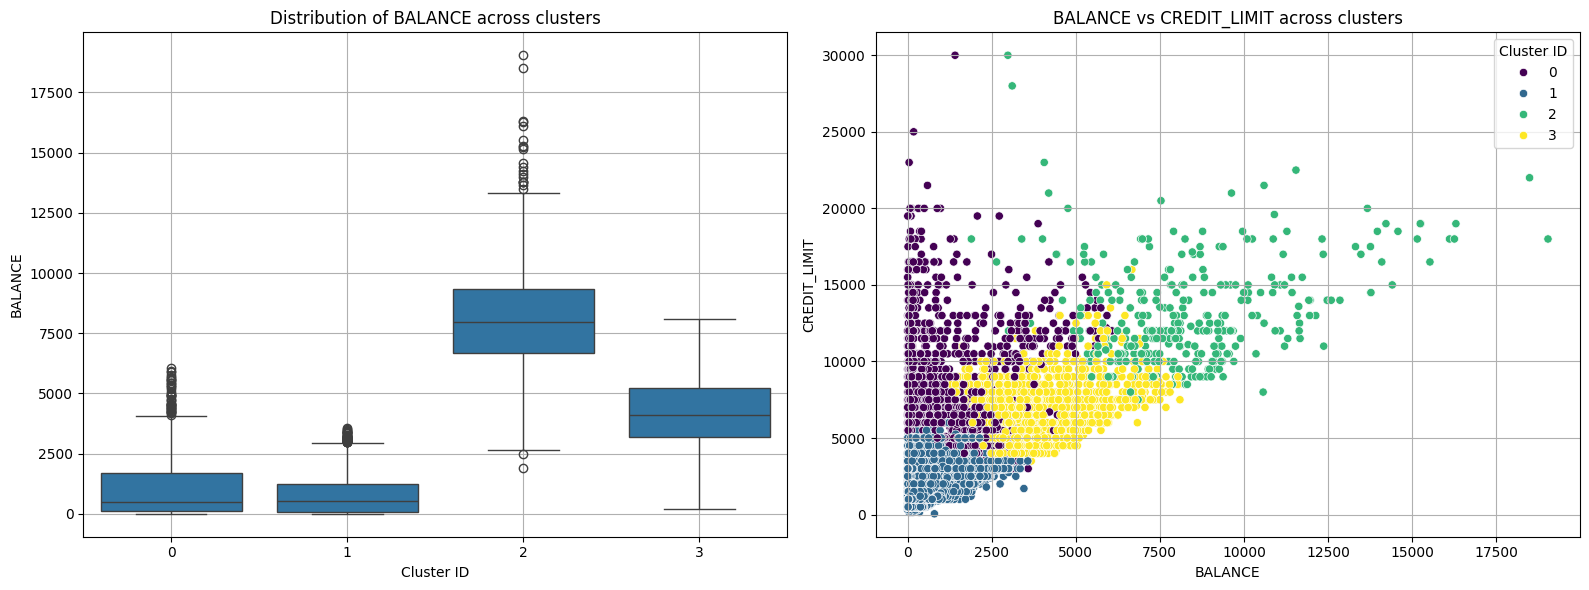

In [71]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
data['Cluster_ID'] = agg_clustering.fit_predict(data_normalized)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], x=data['Cluster_ID'], y=data['BALANCE'])
axes[0].set_title('Distribution of BALANCE across clusters')
axes[0].set_xlabel('Cluster ID')
axes[0].set_ylabel('BALANCE')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['Cluster_ID'], palette='viridis')
axes[1].set_title('BALANCE vs CREDIT_LIMIT across clusters')
axes[1].set_xlabel('BALANCE')
axes[1].set_ylabel('CREDIT_LIMIT')
axes[1].legend(title='Cluster ID')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Charakteristika nalezených clusterů:

- **Cluster 0:**  
  Zákazníci s **nízkými hodnotami BALANCE** a **nízkými až středními hodnotami CREDIT_LIMIT**. Pravděpodobně se jedná o zákazníky, kteří kartu využívají s mírou a mají dostatečný kreditní limit pro případ potřeby.  
  - **Poznámka:** Tato skupina může zahrnovat opatrné zákazníky, kteří si nechávají kreditní limit jako rezervu pro neočekávané situace.

- **Cluster 1:**  
  Zákazníci s **nízkými hodnotami BALANCE i CREDIT_LIMIT**. Pravděpodobně jde o minimálně aktivní nebo neaktivní uživatele, kteří kartu využívají zřídka nebo ji nepoužívají vůbec.  
  - **Poznámka:** Tato skupina může obsahovat zákazníky s nízkou loajalitou, kteří by mohli být cílem retenčních kampaní.

- **Cluster 2:**  
  Zákazníci s **středními až vyššími hodnotami BALANCE i CREDIT_LIMIT**. Pravděpodobně jde o aktivní uživatele, kteří kartu využívají na pravidelné nebo významné nákupy.  
  - **Poznámka:** Tato skupina je klíčová pro generování příjmů. Doporučuje se zaměřit na personalizované nabídky a programy loajality.

- **Cluster 3:**  
  Zákazníci s **nízkými až středními hodnotami BALANCE i CREDIT_LIMIT**. Pravděpodobně jde o zákazníky s omezenou aktivitou, kteří mohou kartu využívat pro drobné nebo příležitostné nákupy.  
  - **Poznámka:** Tato skupina by mohla být cílem marketingových kampaní zaměřených na zvýšení aktivity.

### Shrnutí:
- **Cluster 0:** Nízké BALANCE, nízký až střední CREDIT_LIMIT – opatrní uživatelé, možné cílit na aktivaci.  
- **Cluster 1:** Nízké BALANCE i CREDIT_LIMIT – minimálně aktivní zákazníci, cílit na jejich udržení a zvýšení aktivity.  
- **Cluster 2:** Střední až vyšší BALANCE i CREDIT_LIMIT – aktivní uživatelé, doporučuje se zaměřit na loajalitu a poskytování exkluzivních služeb.  
- **Cluster 3:** Nízké až střední BALANCE i CREDIT_LIMIT – omezená aktivita, zaměřit se na zvýšení aktivity pomocí marketingových strategií.  


## Závěr projektu

#### **Task 1: Exploratory Data Analysis (EDA)**  
Prostřednictvím EDA jsme identifikovali klíčové vzory a závislosti v datech:
- **Balance a Credit Limit** se ukázaly jako klíčové atributy, které významně ovlivňují segmentaci zákazníků.
- Pomocí vizualizací (boxploty, scatterploty) jsme odhalili rozdíly v chování zákazníků.
- Identifikovali jsme několik hypotéz, které byly následně potvrzeny pomocí clusteringu.

#### **Task 2: Clustering Analysis**
Použili jsme dvě metody pro segmentaci dat:
1. **K-Means Clustering:**  
   Na základě elbow metody a silhouette koeficientu jsme definovali optimální počet clusterů (4). Výsledné clustery poskytly smysluplnou segmentaci zákazníků podle jejich chování.
   
2. **Agglomerative Clustering:**  
   Hierarchický clustering nám umožnil ověřit a potvrdit segmentaci. Dendrogram vizualizoval hierarchii mezi datovými body a pomohl určit optimální počet clusterů.